In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import re
from tqdm.notebook import tqdm

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
deep_fitted = Table.read('/home/aalvarez/Phosphoros/Results/SC7_Stars/Deep/phz_cat.fits')
deep = Table.read('/home/aalvarez/Phosphoros/Catalogs/SC7_Stars/Deep.fits')

In [3]:
assert (deep['SOURCE_ID'] == deep_fitted['ID']).all()

In [4]:
sed_re = re.compile('uk([rw]?)(\w\d+(\.\d+)?)(\w+)')

In [5]:
seq = {
    'spectral_type': [],
    'metalicity': [],
    'luminosity_class': []
}
for sed in tqdm(deep_fitted['SED']):
    sed_name = sed.split('/')[2]
    match = sed_re.match(sed_name)
    if not match:
        raise Exception(sed_name)
    seq['metalicity'].append(match.group(1))
    seq['spectral_type'].append(match.group(2))
    seq['luminosity_class'].append(match.group(4))
for k in seq:
    seq[k] = np.array(seq[k])

In [6]:
type_names = np.array([
    'o5', 'o8', 'o9',
    'b0', 'b1', 'b12', 'b2', 'b3', 'b5', 'b57', 'b6', 'b8', 'b9',
    'a0', 'a2', 'a3', 'a47', 'a5', 'a7', 
    'f0', 'f02', 'f2', 'f5', 'f6', 'f8',
    'g0', 'g2', 'g5', 'g8',
    'k0', 'k01', 'k1', 'k2', 'k3', 'k34', 'k4', 'k5', 'k7',
    'm0', 'm1', 'm10', 'm2', 'm2.5', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 
])
lumi_names = np.flip(np.array(['i', 'ii', 'iii', 'iv', 'v']))

In [7]:
type_sorter = np.argsort(type_names)
types = type_sorter[np.searchsorted(type_names, seq['spectral_type'], sorter=type_sorter)]

lumi_sorter = np.argsort(lumi_names)
lumi = lumi_sorter[np.searchsorted(lumi_names, seq['luminosity_class'], sorter=lumi_sorter)]

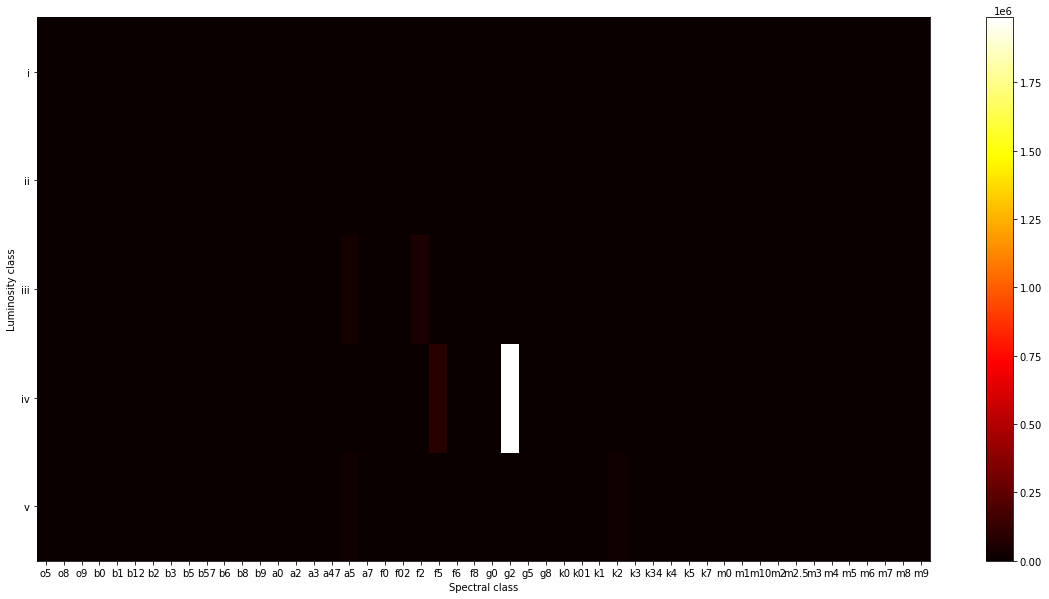

In [8]:
plt.figure()
plt.hist2d(types, lumi, bins=(np.arange(-0.5, len(type_names)+0.5), np.arange(-0.5, len(lumi_names)+0.5)), cmap='hot')
plt.xlabel('Spectral class')
plt.ylabel('Luminosity class')
plt.xticks(np.arange(len(type_names)), type_names)
plt.yticks(np.arange(len(lumi_names)), lumi_names)
plt.colorbar()
plt.show()

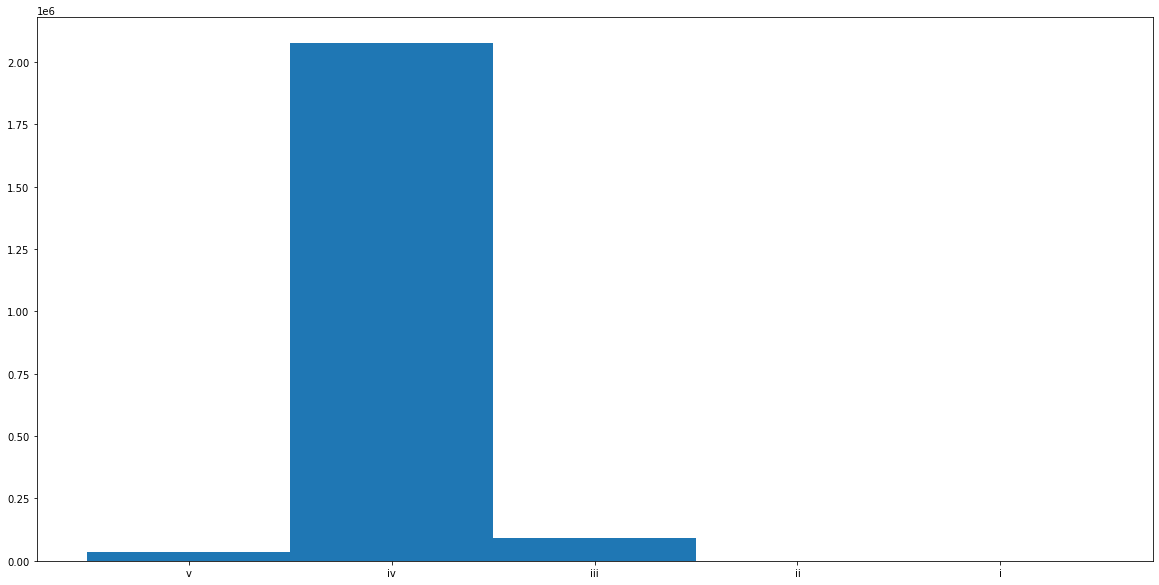

In [9]:
plt.figure()
plt.hist(lumi, bins=np.arange(-0.5, 5))
plt.xticks(np.arange(0, 5), lumi_names)
plt.show()

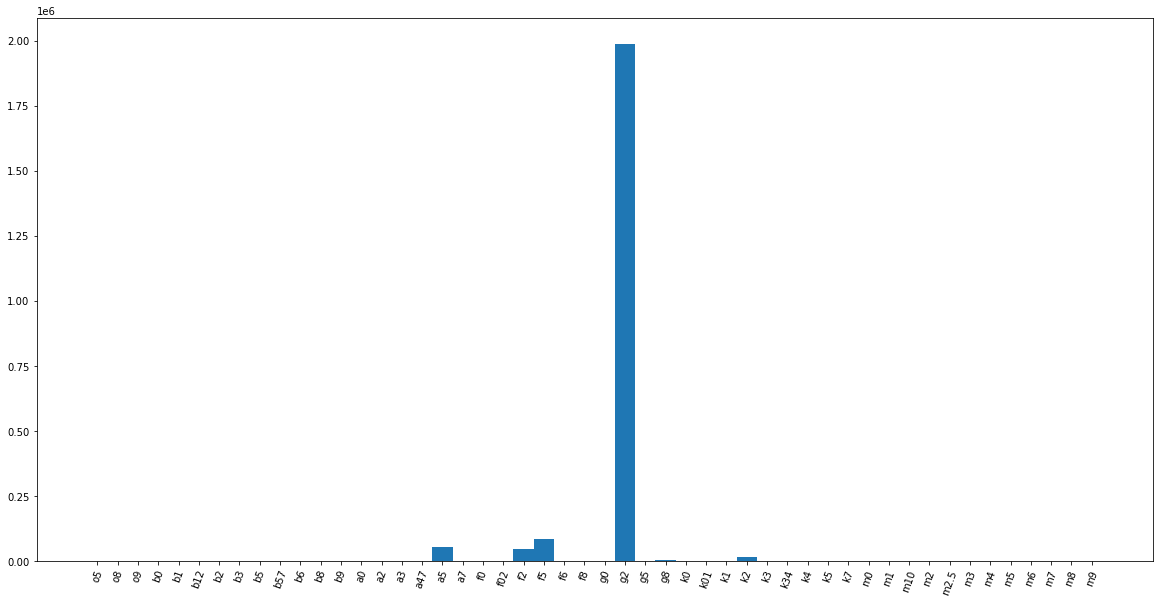

In [10]:
plt.figure()
plt.hist(types, bins=np.arange(-0.5, len(type_names)))
plt.xticks(np.arange(0, len(type_names)), type_names, rotation=70)
plt.show()

In [11]:
# Main sequence only
mask = lumi == 4

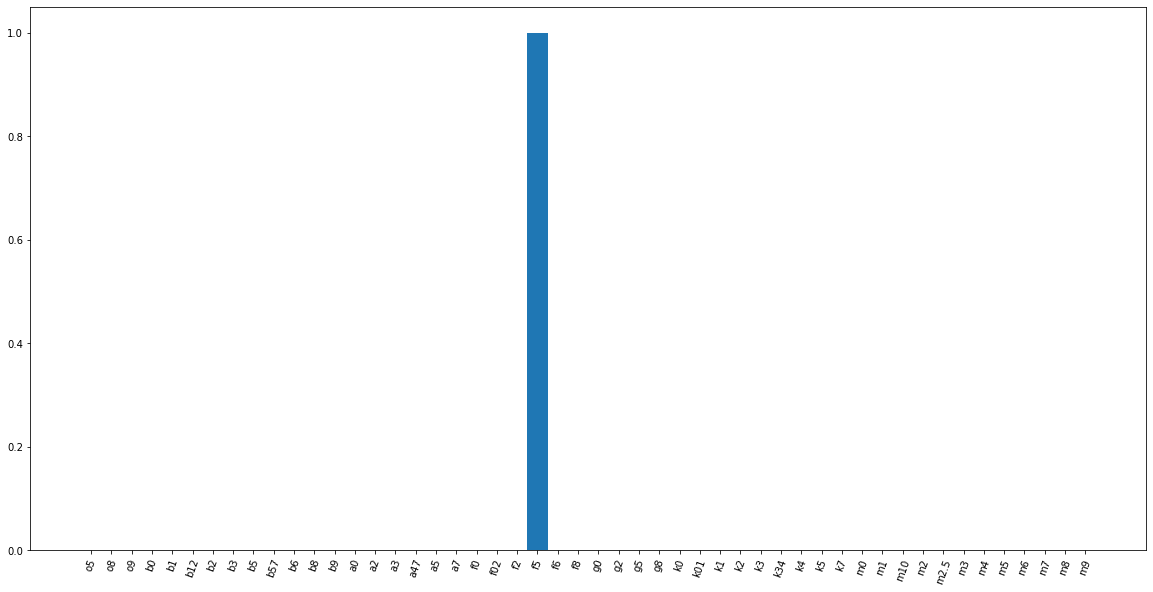

In [12]:
plt.figure()
plt.hist(types[mask], bins=np.arange(-0.5, len(type_names)), density=True)
plt.xticks(np.arange(0, len(type_names)), type_names, rotation=70)
plt.show()

| Type | Expected percentage |
|------|---------------------|
| O    |           0.00003%  |
| B    |              0.13%  |
| A    |              0.6%   |
| F    |              3%     |
| G    |              7.6%   |
| K    |             12.1%   |
| M    |             76.4%   |

In [13]:
spectral_class = dict(O=0, B=0, A=0, F=0, G=0, K=0, M=0)
for t in types[mask]:
    spectral_class[type_names[t][0].upper()] += 1
for k in spectral_class:
    spectral_class[k] /= mask.sum()
    spectral_class[k] *= 100

In [14]:
spectral_class

{'O': 0.0, 'B': 0.0, 'A': 0.0, 'F': 100.0, 'G': 0.0, 'K': 0.0, 'M': 0.0}